
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./SaturatedPointheatsource.ipynb" download="SaturatedPointheatsource.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=SaturatedPointheatsource.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource.py"><img src="https://img.shields.io/static/v1?label=Source:&message=SaturatedPointheatsource.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/master?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource.py%26branch=master%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

## Problem description

The problem describes a heat source embedded in a fully fluid-saturated porous medium.
The spherical symmetry is modeled using a 10 m x 10 m disc with a point heat source ($Q=150\;\mathrm{W}$) placed at one corner ($r=0$) and a curved boundary at $r=10\;\mathrm{m}$. Applying rotational axial symmetry at one of the linear boundaries, the model region transforms into a half-space configuration of the spherical symmetrical problemcorresponding to the analytical solution.
The initial temperature and the excess pore pressure are 273.15 K and 0 Pa, respectively.
The axis-normal displacements along the symmetry (inner) boundaries were set to zero, whereas the excess pore pressure, as well as the temperature, are set to their initial values along the outer (curved) boundary.
The heat coming from the point source is propagated through the medium, causing the fluid and the solid to expand at different rates. The resulting pore pressure (gradient) is triggering a thermally driven consolidation process caused by the fluid flowing away from the heat source until equilibrium is reached.

![PointHeatSourceSchematic.png](figures/PointHeatSourceSchematic.png)

# Governing equations

For this problem we consider the following assumptions:

* No thermal adverction is considered: $\rho_\text{w}c_\text{w}T_{,i} v_i = 0$.

* Gravitational forces are neglected: $\rho g = 0$.

* Both fluid and solid phases are intrinsically incompressible: $\alpha_B = 1$; $\beta = 0$.

* No external fluid sink or source term: $q_H = 0$.

* The porous medium is isotropic and homogeneous.

These assumptions lead to the following set of governing equation describing the system behavior:

**Energy balance**

$$
\begin{gather}
    m \dot T - (K T_{,i})_{,i} = q_T
%
\\
%
    \text{where}\nonumber
%
\\
%
    m = \phi \rho_w c_w + (1-\phi) \rho_s c_s
%
\\
%
    K = \phi K_w + (1 - \phi) K_s
%
\\
%
    v_i = -\dfrac{k_s}{\eta} (p_{,i})
\end{gather}
$$

**Mass balance**

$$
\begin{gather}
    - a_u \dot T+ \dot u_{i,i} + v_{i,i} = 0
%
\\
%
    \text{where}\nonumber
%
\\
%
    a_u = \phi a_w + (1-\phi) a_s
\end{gather}
$$

**Momentum balance**

$$
\begin{equation}
    \sigma_{ij} = \sigma^\prime_{ij} - p \delta_{ij} = 0
\end{equation}
$$

A detailed description about the problem formulation and equation derivation can be found in the original work of Booker and Savvidou (1985) or Chaudhry et al. (2019).

## Input parameters

We considered the following set of values as input parameters:

![PointHeatSourceInput.png](figures/PointHeatSourceInput.png)


# The analytical solution


The analytical solution of the coupled THM consolidation problem is derived in the original work of Booker and Savvidou (1985). In Chaudhry et al. (2019), a corrected solution is given for the effective stress term.

For clarification, the equations below are based on the solid mechanics sign convention (tensile stress is positive). Furthermore, temporal partial derivative is indicated by the dot convention, while spatial partial derivatives are expressed by the comma convention, i.e. $(\cdot)_{,i}=\partial (\cdot)/\partial x_i$.

The analytical solution for the three primary variables are expressed as:

**Temperature**

$$
\begin{equation}
    \Delta T = \dfrac{Q}{4 \pi K r} f^{\kappa}
\end{equation}
$$

**Pore pressure**

$$
\begin{equation}
    p = \dfrac{X Q}{(1 - \frac{c}{\kappa}) 4 \pi K r} (f^{\kappa}-f^{c})
\end{equation}
$$

**Displacement of the solid skeleton**

$$
\begin{equation}
    u_{i} = \dfrac{Q a_u x_i}{4 \pi K r} g^{\ast}
\end{equation}
$$

In the above equations, the following derived parameters are used:

$$
\begin{align}
    \kappa &= \dfrac{K}{m}
%
\\
%
    c &= \dfrac{k_s}{\eta}(\lambda + 2G)
%
\\
%
    r &= \sqrt{x_{1}^{2}+x_{2}^{2}+x_{3}^{2}}
%
\\
%
    X &= a_\text{u}\left(\lambda+2G\right)-b^{\prime}
%
\\
%
    Y &= \dfrac{1}{\lambda+2G}\left(\dfrac{X}{\left(1-\dfrac{c}{\kappa}\right)a_\text{u}}+\dfrac{b^{\prime}}{a_\text{u}}\right)
%
\\
%
    Z &= \dfrac{1}{\lambda+2G}\left(\dfrac{X}{\left(1-\dfrac{c}{\kappa}\right)a_\text{u}}\right)
%
\\
%
    f^{A} &= \text{erfc}\left(\dfrac{r}{2\sqrt{At}}\right),\quad A=\kappa,c
%
\\
%
    g^{A} &= \dfrac{At}{r^{2}}+\left(\frac{1}{2}-\dfrac{At}{r^{2}}\right)f^{A}-\sqrt{\dfrac{At}{\pi r^{2}}} \exp\left(-\dfrac{r^{2}}{4At}\right)
%
\\
%
    g^{\ast} &= Yg^{\kappa}-Zg^{c}
%
\\
%
    g^{A}_{,i} &= \frac{2x_{i}At}{r^{4}}\left(f^{A}-1+\frac{r}{\sqrt{\pi At}}\exp\left(-\frac{r^{2}}{4At}\right)\right),\quad i=1,2,3
%
\\
%
    g^{\ast}_{,i} &= Yg^{\kappa}_{,i}-Zg^{c}_{,i}
\end{align}
$$

The corrected form of the effective stress:

$$
\begin{align}
    \sigma^{\prime}_{ij|j=i} &= \frac{Q a_\text{u}}{4\pi Kr}\left( 2G\left[g^{\ast}\left(1-\frac{x^{2}_{i}}{r^{2}}\right)+x_{i}g^{\ast}_{,i}\right]+\lambda \left[x_{i}g^{\ast}_{,i}+2g^{\ast}\right]\right)-b^{\prime}\Delta T
%
\\
%
    \sigma^\prime_{ij|j \neq i} &= \frac{Q a_\text{u}}{4\pi Kr}\left( G\left[x_{i}g^{\ast}_{,j}+x_{j}g^{\ast}_{,i}-2g^{\ast}\dfrac{x_{i}x_{j}}{r^{2}}\right]\right)
\end{align}
$$

In [1]:
import concurrent.futures
import os
import platform
from pathlib import Path
from subprocess import run
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot
import vtuIO
from scipy import special as sp

In [2]:
class ANASOL:
    def __init__(self):
        # material parameters
        self.phi = 0.16  # porosity of soil
        self.k = 2e-20  # coefficient of permeability
        self.eta = 1e-3  # viscosity water at 20 deg
        self.E = 5.0e9  # Youngs modulus
        self.nu = 0.3  # Poisson ratio
        self.rho_w = 999.1  # density of pore water
        self.c_w = 4280  # specific heat of pore water
        self.K_w = 0.6  # thermal conductivity of pore water
        self.rho_s = 2290.0  # density of solid matrix
        self.c_s = 917.654  # specific heat capacity of solid matrix
        self.K_s = 1.838  # themal conductivity of solid matrix
        self.a_s = (
            3 * 1.5e-5
        )  # volumetric expansivity of matrix - value conversion from linear to volumetric expansivity
        self.a_w = 4.0e-4  # coefficient of volume expansion of pore water (beta_w)

        # initial and boundary condition
        self.Q = (
            2 * 150
        )  # [Q]=W strength of the heat source - value corrected to account for domain size
        self.T0 = 273.15  # initial temperature

        self.Init()

    # derived parameters
    def f(self, ka, R, t):
        return sp.erfc(R / (2 * np.sqrt(ka * t)))

    def g(self, ka, R, t):
        return (
            ka * t / R**2
            + (1 / 2 - ka * t / R**2) * sp.erfc(R / (2 * np.sqrt(ka * t)))
            - np.sqrt(ka * t / (np.pi * R**2)) * np.exp(-(R**2) / (4 * ka * t))
        )

    def gstar(self, R, t):
        return self.Y * self.g(self.kappa, R, t) - self.Z * self.g(self.c, R, t)

    def R(self, x, y, z):
        return np.sqrt(x**2 + y**2 + z**2)

    def dg_dR(self, ka, i, R, t):
        return (2 * i / R**3) * np.sqrt(ka * t / np.pi) * np.exp(
            -R * R / (4 * ka * t)
        ) + (2 * i * ka * t / R**4) * (self.f(ka, R, t) - 1)

    def dgstar_dR(self, i, R, t):  # Subscript R means derivative w.r.t R
        return self.Y * self.dg_dR(self.kappa, i, R, t) - self.Z * self.dg_dR(
            self.c, i, R, t
        )

    # corrected form of effective stress
    def sigma_ii(self, x, y, z, t, ii):  # for normal components
        R = self.R(x, y, z)
        index = {"xx": x, "yy": y, "zz": z}
        return (self.Q * self.a_u / (4 * np.pi * self.K * R)) * (
            2
            * self.G
            * (
                self.gstar(R, t) * (1 - index[ii] ** 2 / R**2)
                + index[ii] * self.dgstar_dR(index[ii], R, t)
            )
            + self.lambd
            * (
                x * self.dgstar_dR(x, R, t)
                + y * self.dgstar_dR(y, R, t)
                + z * self.dgstar_dR(z, R, t)
                + 2 * self.gstar(R, t)
            )
        ) - self.bprime * (self.temperature(x, y, z, t) - self.T0)

    def sigma_ij(self, x, y, z, t, i, j):  # for shear components
        R = self.R(x, y, z)
        index = {"x": x, "y": y, "z": z}
        return (self.Q * self.a_u / (4 * np.pi * self.K * R)) * (
            2
            * self.G
            * (
                index[i] * self.dgstar_dR(index[j], R, t) / 2
                + index[j] * self.dgstar_dR(index[i], R, t) / 2
                - index[i] * index[j] * self.gstar(R, t) / R**2
            )
        )

    # primary variables
    def temperature(self, x, y, z, t):
        R = self.R(x, y, z)
        return self.Q / (4 * np.pi * self.K * R) * self.f(self.kappa, R, t) + self.T0

    def porepressure(self, x, y, z, t):
        R = self.R(x, y, z)
        return (
            self.X
            / (1 - self.c / self.kappa)
            * self.Q
            / (4 * np.pi * self.K * R)
            * (self.f(self.kappa, R, t) - self.f(self.c, R, t))
        )

    def u_i(self, x, y, z, t, i):
        R = self.R(x, y, z)
        index = {"x": x, "y": y, "z": z}
        return (
            self.a_u * index[i] * self.Q / (4 * np.pi * self.K * R) * self.gstar(R, t)
        )

    def Init(self):
        # derived constants
        self.lambd = (
            self.E * self.nu / ((1 + self.nu) * (1 - 2 * self.nu))
        )  # Lame constant
        self.G = self.E / (2 * (1 + self.nu))  # shear constant

        self.K = (
            self.phi * self.K_w + (1 - self.phi) * self.K_s
        )  # average thermal conductivity
        self.m = (
            self.phi * self.rho_w * self.c_w + (1 - self.phi) * self.rho_s * self.c_s
        )
        self.kappa = self.K / self.m  # scaled heat conductivity
        self.c = self.k / self.eta * (self.lambd + 2 * self.G)

        self.aprime = self.a_s
        self.a_u = self.a_s * (1 - self.phi) + self.a_w * self.phi
        self.bprime = (self.lambd + 2 * self.G / 3) * self.aprime

        self.X = self.a_u * (self.lambd + 2 * self.G) - self.bprime
        self.Y = (
            1
            / (self.lambd + 2 * self.G)
            * (self.X / ((1 - self.c / self.kappa) * self.a_u) + self.bprime / self.a_u)
        )
        self.Z = (
            1
            / (self.lambd + 2 * self.G)
            * (self.X / ((1 - self.c / self.kappa) * self.a_u))
        )


ana_model = ANASOL()


## The numerical solutions

For the numerical solution we compare the Thermal-Hydro-Mechanical (THM - linear and quadratic mesh), Thermal-2-Phase-Hydro-Mechanical (TH2M) and Thermal-Richard-Mechanical (TRM - quadratic mesh) formulation of OGS.

The TH2M and TRM formulation methods have essential differences when applied to an unsaturated media where a gas phase is also present along side the aqueous phase. The difference originates from the way how the two mobile phases are treated specifically in the equation system: in the TH2M formulation, both the gas phase and the liquid phase is explicitely present and each phase is comprised of the two distinct component of aqueous component and non-aqueous component. In this case, the gas phase has a variable pressure solved explicitely in the governing equations. On the other hand, the TRM model assumes that the gas phase mobility is high and fast enough that gas drainage can occur significantly faster than the other processes in the system and hence, gas pressure doesn't build up. This leads to the simplification, that no gas pressure is calculated in the TRM model explicitely.

The THM model is a simplified form of the general TH2M model, where there is no gas phase, only the aqueous phase is present in the equation system.

In addition to the different formulation, we also compare the performance of the THM formulation with a linear and a quadratic mesh as well.

In [3]:
data_dir = os.environ.get("OGS_DATA_DIR", "../../..")

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

# THM formulation (current working dir)
prj_file_lin = "pointheatsource_linear-mesh.prj"
prj_file_quad = "pointheatsource_quadratic-mesh.prj"
ogs_model_lin = ot.Project(
    input_file=prj_file_lin, output_file=f"{out_dir}/{prj_file_lin}"
)
ogs_model_quad = ot.Project(
    input_file=prj_file_quad, output_file=f"{out_dir}/{prj_file_quad}"
)

# TH2M formulation
prj_file_th2m = "point_heatsource.prj"
path_th2m = f"{data_dir}/TH2M/THM/sphere"
prj_filepath_th2m = f"{path_th2m}/{prj_file_th2m}"
ogs_model_th2m = ot.Project(
    input_file=prj_filepath_th2m, output_file=f"{out_dir}/pointheatsource_th2m.prj"
)

# TRM formulation
prj_file_trm = "point_heat_source_2D.prj"
path_trm = f"{data_dir}/ThermoRichardsMechanics/PointHeatSource"
prj_filepath_trm = f"{path_trm}/{prj_file_trm}"
ogs_model_trm = ot.Project(
    input_file=prj_filepath_trm, output_file=f"{out_dir}/pointheatsource_trm.prj"
)

In [4]:
# Simulation time
t_end = 2e6  # <= was originally 5e6
ogs_model_lin.set(t_end=t_end)
ogs_model_quad.set(t_end=t_end)
ogs_model_th2m.set(t_end=t_end)
ogs_model_trm.set(t_end=t_end)

In [5]:
ogs_model_lin.set(output_prefix="pointheatsource_lin")
ogs_model_quad.set(output_prefix="pointheatsource_quad")
ogs_model_th2m.set(output_prefix="pointheatsource_th2m")
ogs_model_th2m.replace_text(
    "150", xpath="./parameters/parameter[name='temperature_source_term']/value"
)
ogs_model_trm.set(output_prefix="pointheatsource_trm")

In [6]:
ogs_model_lin.write_input()
ogs_model_quad.write_input()
ogs_model_th2m.write_input()
ogs_model_trm.write_input()

In [7]:
# Run models in parallel via concurrent.futures
ogs_models = []
ogs_models.append(
    {
        "model": ogs_model_lin.prjfile,
        "logfile": f"{out_dir}/lin-out.txt",
        "args": f"-o {out_dir} -m . -s .",
    }
)
ogs_models.append(
    {
        "model": ogs_model_quad.prjfile,
        "logfile": f"{out_dir}/quad-out.txt",
        "args": f"-o {out_dir} -m . -s .",
    }
)
ogs_models.append(
    {
        "model": ogs_model_th2m.prjfile,
        "logfile": f"{out_dir}/th2m-out.txt",
        "args": f"-o {out_dir} -m {path_th2m} -s {path_th2m}",
    }
)
ogs_models.append(
    {
        "model": ogs_model_trm.prjfile,
        "logfile": f"{out_dir}/trm-out.txt",
        "args": f"-o {out_dir} -m {path_trm} -s {path_trm}",
    }
)


def run_ogs(model):
    prj = model["model"]
    print(f"Starting {prj} ...\n")
    start_sim = timer()
    # Starting via ogs6py does not work ("cannot pickle lxml"), at least on mac.
    run(f"ogs {prj} {model['args']} > {model['logfile']}", shell=True, check=True)
    runtime = timer() - start_sim
    return [f"Finished {prj} in {runtime} s", runtime]


if platform.system() == "Darwin":
    import multiprocessing as mp

    mp.set_start_method("fork")

runtimes = []
start = timer()
with concurrent.futures.ProcessPoolExecutor() as executor:
    results = executor.map(run_ogs, ogs_models)
    for result in results:
        print(result[0])
        runtimes.append(result[1])
print(f"Elapsed time for all simulations: {timer() - start} s")

Starting /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_quadratic-mesh.prj ...


Starting /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_th2m.prj ...


Starting /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_linear-mesh.prj ...


Starting /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_trm.prj ...


Finished /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_linear-mesh.prj in 111.57896350882947 s


Finished /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_quadratic-mesh.prj in 309.62484860792756 s


Finished /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_th2m.prj in 345.5373702868819 s
Finished /var/lib/gitlab-runner/builds/vZ6vnZiU/0/ogs/build/release-all/Tests/Data/ThermoHydroMechanics/Linear/Point_injection/SaturatedPointheatsource/pointheatsource_trm.prj in 206.14212676510215 s
Elapsed time for all simulations: 345.7325316686183 s


## Evaluation and Results

The analytical expressions together with the numerical model can now be evaluated at different points as a function of time (time series) or for a given time as a function of their spatial coordinates (along radial axis).

In [8]:
# Point of interest
pts = {"pt0": (0.5, 0.5, 0.0)}

# Time axis for analytical solution
t = np.linspace(1, 50000 * 200, num=201, endpoint=True)

projects = [
    "pointheatsource_lin",
    "pointheatsource_quad",
    "pointheatsource_th2m",
    "pointheatsource_trm",
]

pvds = []
for prj in projects:
    pvds.append(vtuIO.PVDIO(f"{out_dir}/{prj}.pvd", dim=2))

### Time series plots for temperature, pressure and displacement

Comparison between the analytical solution and the numerical solution shows very good agreement, as displayed below in the figures.

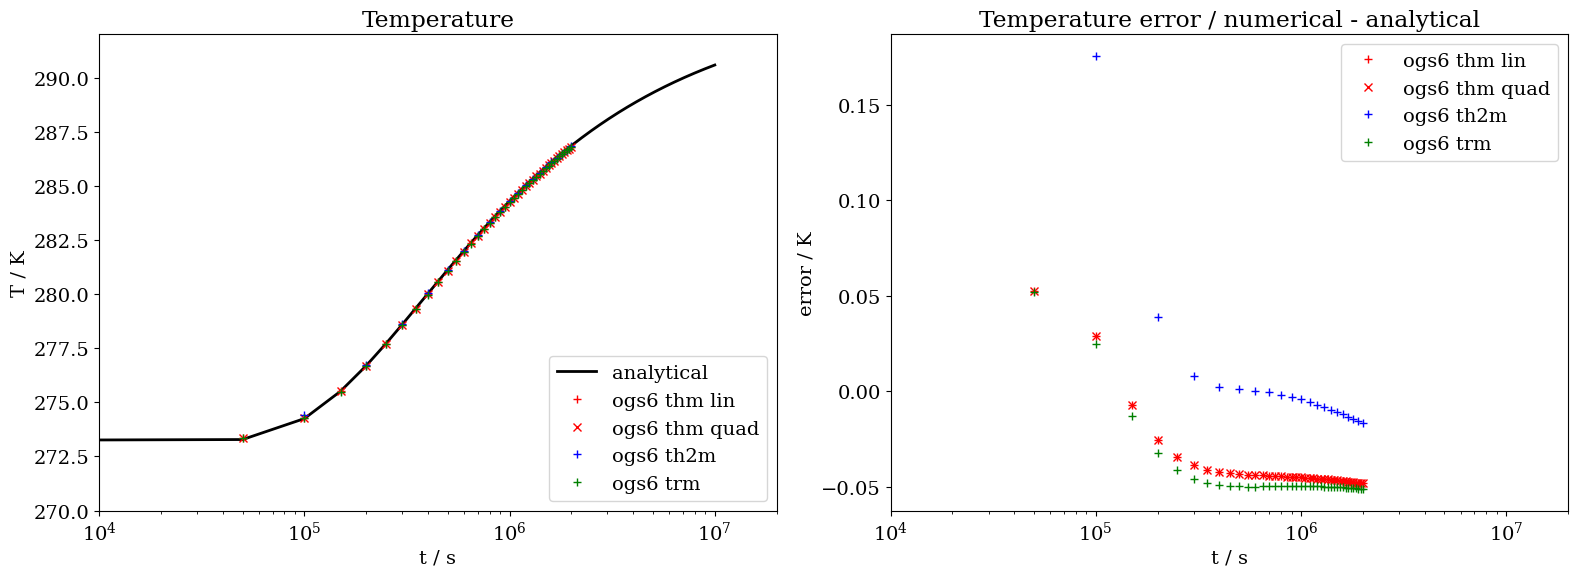

In [9]:
plt.rcParams["lines.linewidth"] = 2.0
plt.rcParams["lines.color"] = "black"
plt.rcParams["legend.frameon"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["font.size"] = 14
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["figure.figsize"] = (16, 6)

output = {
    "T": (
        "temperature",
        "temperature_interpolated",
        "temperature_interpolated",
        "temperature_interpolated",
    ),
    "p": (
        "pressure",
        "pressure_interpolated",
        "gas_pressure_interpolated",
        "pressure_interpolated",
    ),
    "u": ("displacement", "displacement", "displacement", "displacement"),
    "color": ("r+", "rx", "b+", "g+"),
    "label": ("ogs6 thm lin", "ogs6 thm quad", "ogs6 th2m", "ogs6 trm"),
}

fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(
    t,
    ana_model.temperature(pts["pt0"][0], pts["pt0"][1], pts["pt0"][2], t),
    "k",
    label="analytical",
)
for i, pvd in enumerate(pvds):
    ax1.plot(
        pvd.timesteps,
        pvd.read_time_series(output["T"][i], pts=pts)["pt0"],
        output["color"][i],
        label=output["label"][i],
    )
ax1.set_xscale("log")
ax1.set_xlabel("t / s")
ax1.set_ylabel("T / K")
ax1.set_xlim(1.0e4, 2.0e7)
ax1.set_ylim(270.0, 292.0)
ax1.legend(loc="lower right")
ax1.set_title("Temperature")

ax2.set_xscale("log")
ax2.set_xlabel("t / s")
ax2.set_ylabel("error / K")
ax2.set_xlim(1.0e4, 2.0e7)
ax2.set_title("Temperature error / numerical - analytical")

for i, pvd in enumerate(pvds):
    interp_ana_model = np.interp(
        pvd.timesteps,
        t,
        ana_model.temperature(pts["pt0"][0], pts["pt0"][1], pts["pt0"][2], t),
    )
    error = pvd.read_time_series(output["T"][i], pts=pts)["pt0"] - interp_ana_model
    ax2.plot(pvd.timesteps, error, output["color"][i], label=output["label"][i])
    assert np.all(error < 0.2)
    assert np.all(error > -0.06)

ax2.legend(loc="upper right")

fig1.tight_layout()

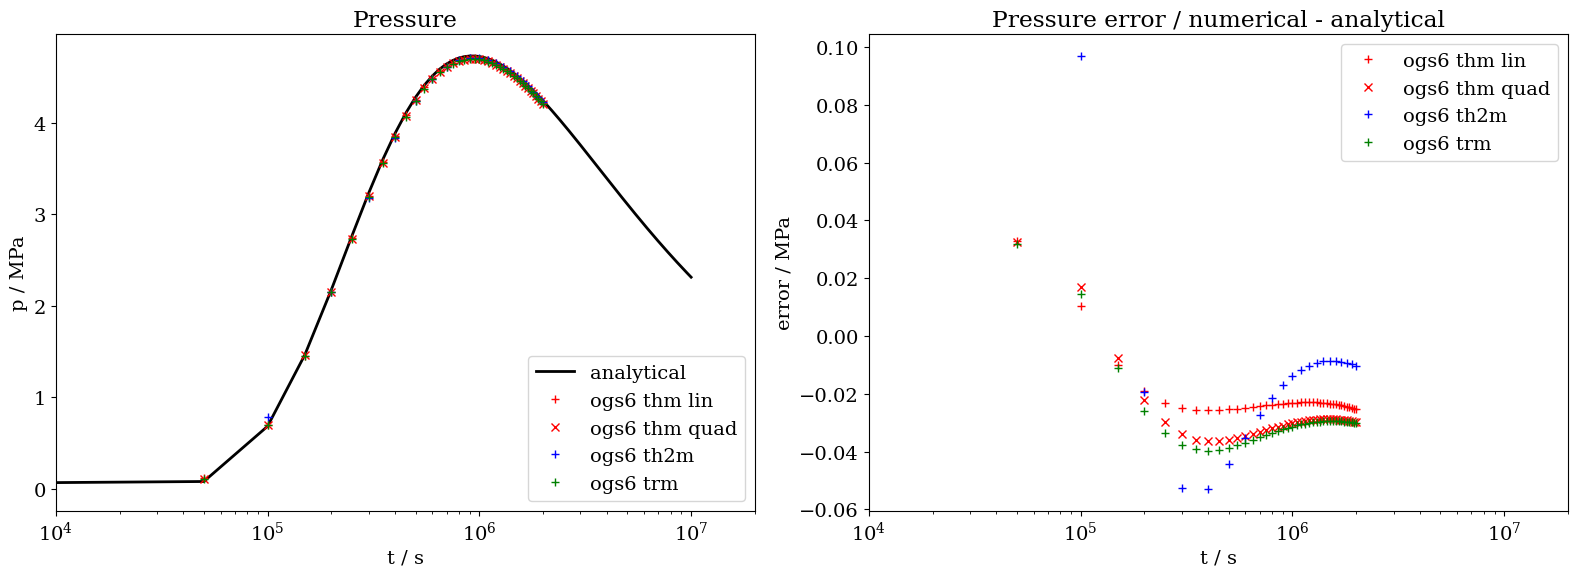

In [10]:
fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(
    t,
    ana_model.porepressure(pts["pt0"][0], pts["pt0"][1], pts["pt0"][2], t) / 1.0e6,
    "k",
    label="analytical",
)
for i, pvd in enumerate(pvds):
    ax1.plot(
        pvd.timesteps,
        pvd.read_time_series(output["p"][i], pts=pts)["pt0"] / 1.0e6,
        output["color"][i],
        label=output["label"][i],
    )
ax1.set_xscale("log")
ax1.set_xlabel("t / s")
ax1.set_ylabel("p / MPa")
ax1.set_xlim(1.0e4, 2.0e7)
ax1.legend(loc="lower right")
ax1.set_title("Pressure")

ax2.set_xscale("log")
ax2.set_xlabel("t / s")
ax2.set_ylabel("error / MPa")
ax2.set_xlim(1.0e4, 2.0e7)
ax2.set_title("Pressure error / numerical - analytical")

for i, pvd in enumerate(pvds):
    interp_ana_model = np.interp(
        pvd.timesteps,
        t,
        ana_model.porepressure(pts["pt0"][0], pts["pt0"][1], pts["pt0"][2], t),
    )
    error = pvd.read_time_series(output["p"][i], pts=pts)["pt0"] - interp_ana_model
    ax2.plot(pvd.timesteps, error / 1.0e6, output["color"][i], label=output["label"][i])
    assert np.all(error < 0.1 * 1e6)
    assert np.all(error > -0.06 * 1e6)

ax2.legend(loc="upper right")

fig1.tight_layout()

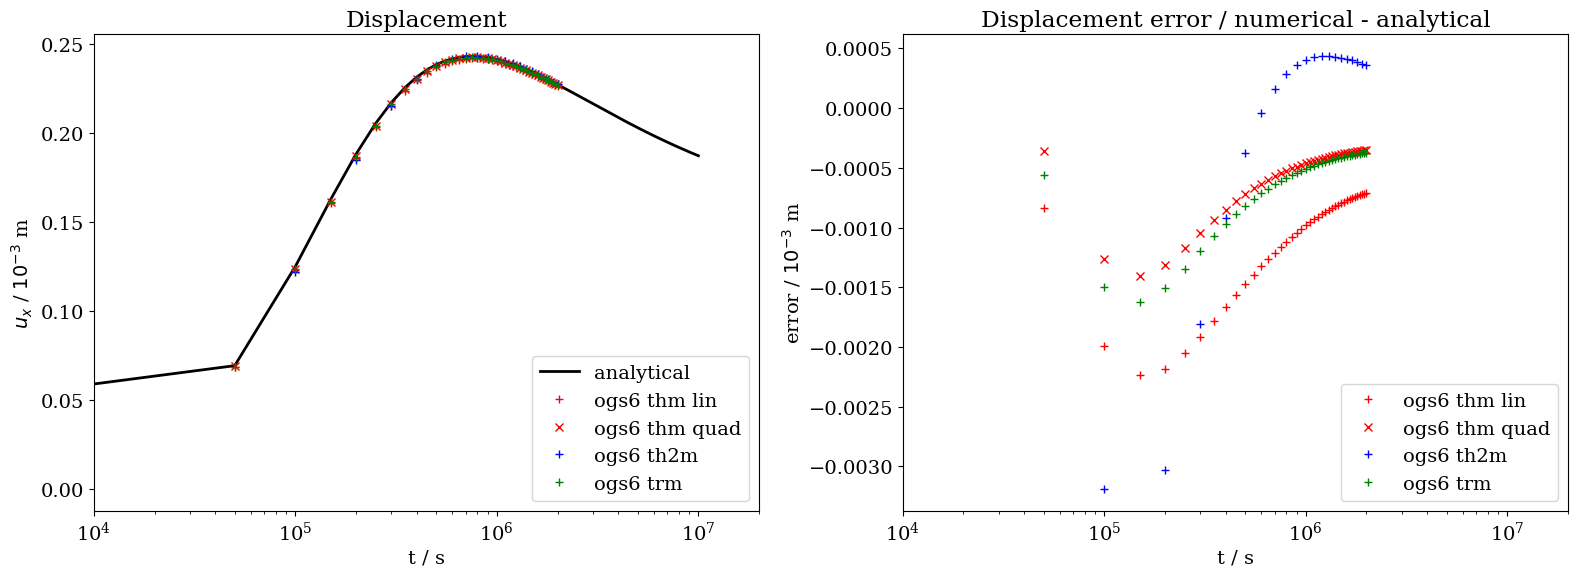

In [11]:
fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(
    t,
    ana_model.u_i(pts["pt0"][0], pts["pt0"][1], pts["pt0"][2], t, "x") * 1000,
    "k",
    label="analytical",
)
for i, pvd in enumerate(pvds):
    ax1.plot(
        pvd.timesteps,
        pvd.read_time_series(output["u"][i], pts=pts)["pt0"][:, 0] * 1000,
        output["color"][i],
        label=output["label"][i],
    )
ax1.set_xscale("log")
ax1.set_xlabel("t / s")
ax1.set_ylabel("$u_x$ / $10^{-3}$ m")
ax1.set_xlim(1.0e4, 2.0e7)
ax1.legend(loc="lower right")
ax1.set_title("Displacement")

ax2.set_xscale("log")
ax2.set_xlabel("t / s")
ax2.set_ylabel("error / $10^{-3}$ m")
ax2.set_xlim(1.0e4, 2.0e7)
ax2.set_title("Displacement error / numerical - analytical")

for i, pvd in enumerate(pvds):
    interp_ana_model = np.interp(
        pvd.timesteps,
        t,
        ana_model.u_i(pts["pt0"][0], pts["pt0"][1], pts["pt0"][2], t, "x"),
    )
    error = (
        pvd.read_time_series(output["u"][i], pts=pts)["pt0"][:, 0] - interp_ana_model
    )
    ax2.plot(pvd.timesteps, error * 1000, output["color"][i], label=output["label"][i])
    assert np.all(error < 0.0005)
    assert np.all(error > -0.0035)

ax2.legend(loc="lower right")

fig1.tight_layout()

### Plots for temperature, pressure and displacement along the radial axis

The comparison between the analytical and the numerical results along the radial axis generally shows good agreement. The differences observed can be primarily explained by mesh discretization and finite size effects. This is particularly the case for the th2m simulation results, where the differences are slightly more emphasized which is the results of larger time steps.

In [12]:
# Time stamp for the results along the radial axis
t_i = 1.0e5

# Radial coordinates for plotting
x = np.linspace(start=0.0001, stop=10.0, num=100)
r = [(i, 0, 0) for i in x]

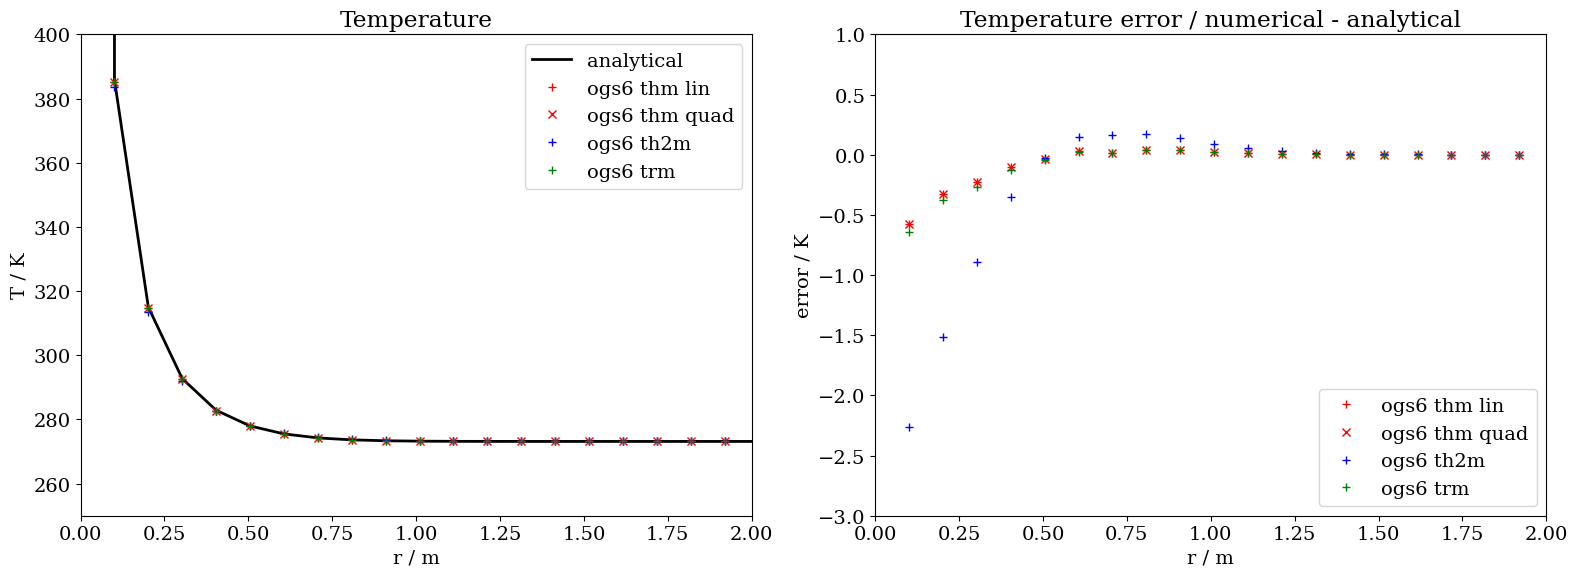

In [13]:
fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x, ana_model.temperature(x, 0, 0, t_i), "k", label="analytical")
for i, pvd in enumerate(pvds):
    ax1.plot(
        x,
        pvd.read_set_data(t_i, output["T"][i], pointsetarray=r, data_type="point"),
        output["color"][i],
        label=output["label"][i],
    )

ax1.set_xlim(0, 2.0)
ax1.set_ylim(250.0, 400.0)
ax1.set_xlabel("r / m")
ax1.set_ylabel("T / K")
ax1.legend()
ax1.set_title("Temperature")

ax2.set_xlim(0, 2.0)
ax2.set_ylim(-3, 1)
ax2.set_xlabel("r / m")
ax2.set_ylabel("error / K")
ax2.set_title("Temperature error / numerical - analytical")

for i, pvd in enumerate(pvds):
    error = pvd.read_set_data(
        t_i, output["T"][i], pointsetarray=r, data_type="point"
    ) - ana_model.temperature(x, 0, 0, t_i)
    ax2.plot(x, error, output["color"][i], label=output["label"][i])
    assert np.all(
        error[1:] < 0.5
    )  # do not check first entry, which corresponds to the origin
    assert np.all(
        error[1:] > -2.5
    )  # do not check first entry, which corresponds to the origin

ax2.legend()

fig1.tight_layout()

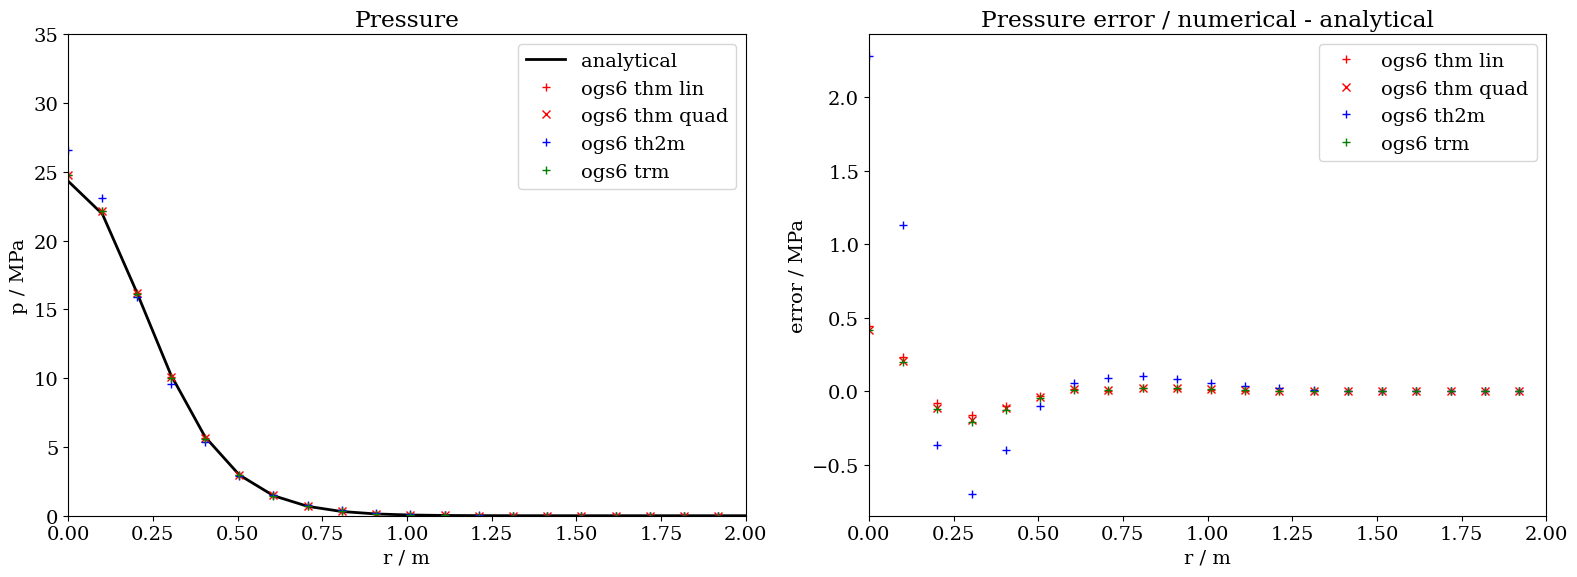

In [14]:
fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x, ana_model.porepressure(x, 0, 0, t_i) / 1e6, "k", label="analytical")
for i, pvd in enumerate(pvds):
    ax1.plot(
        x,
        pvd.read_set_data(t_i, output["p"][i], pointsetarray=r, data_type="point")
        / 1.0e6,
        output["color"][i],
        label=output["label"][i],
    )

ax1.set_xlim(0, 2.0)
ax1.set_ylim(0, 35.0)
ax1.set_xlabel("r / m")
ax1.set_ylabel("p / MPa")
ax1.legend()
ax1.set_title("Pressure")

ax2.set_xlim(0, 2.0)
ax2.set_xlabel("r / m")
ax2.set_ylabel("error / MPa")
ax2.set_title("Pressure error / numerical - analytical")

for i, pvd in enumerate(pvds):
    error = (
        pvd.read_set_data(t_i, output["p"][i], pointsetarray=r, data_type="point")
        - ana_model.porepressure(x, 0, 0, t_i)
    ) / 1.0e6
    ax2.plot(x, error, output["color"][i], label=output["label"][i])
    assert np.all(error < 2.5)
    assert np.all(error > -1.0)

ax2.legend()

fig1.tight_layout()

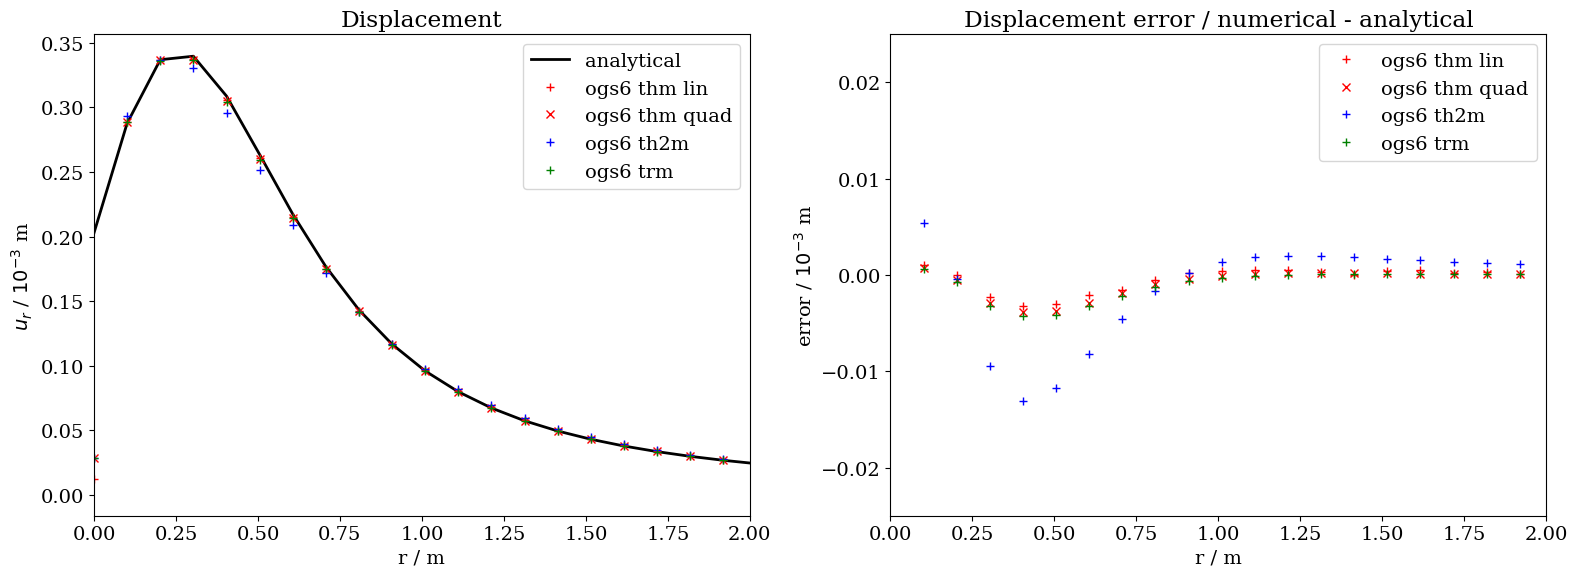

In [15]:
fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x, ana_model.u_i(x, 0, 0, t_i, "x") * 1000, "k", label="analytical")
for i, pvd in enumerate(pvds):
    ax1.plot(
        x,
        pvd.read_set_data(t_i, output["u"][i], pointsetarray=r, data_type="point")[:, 0]
        * 1000,
        output["color"][i],
        label=output["label"][i],
    )

ax1.set_xlim(0, 2.0)
ax1.set_xlabel("r / m")
ax1.set_ylabel("$u_r$ / $10^{-3}$ m")
ax1.legend()
ax1.set_title("Displacement")

ax2.set_xlim(0, 2.0)
ax2.set_ylim(-0.025, 0.025)
ax2.set_xlabel("r / m")
ax2.set_ylabel("error / $10^{-3}$ m")
ax2.set_title("Displacement error / numerical - analytical")

for i, pvd in enumerate(pvds):
    error = (
        pvd.read_set_data(t_i, output["u"][i], pointsetarray=r, data_type="point")[:, 0]
        - ana_model.u_i(x, 0, 0, t_i, "x")
    ) * 1000
    ax2.plot(x, error, output["color"][i], label=output["label"][i])
    assert np.all(error[1:] < 0.01)
    assert np.all(error[1:] > -0.015)

ax2.legend()

fig1.tight_layout()

## Execution times

To compare the performance of the different numerical solutions implemented in OGS6, we compare the execution time of the simulations. The linear thm and trm solutions perform best, while the quadratic thm and th2m solutions take significantly longer time to run. It is also important to mention here, that the time step size selected for the th2m solution are twice as big as the other 3 implementation, yet simulation time still takes longer than any of the other solution.

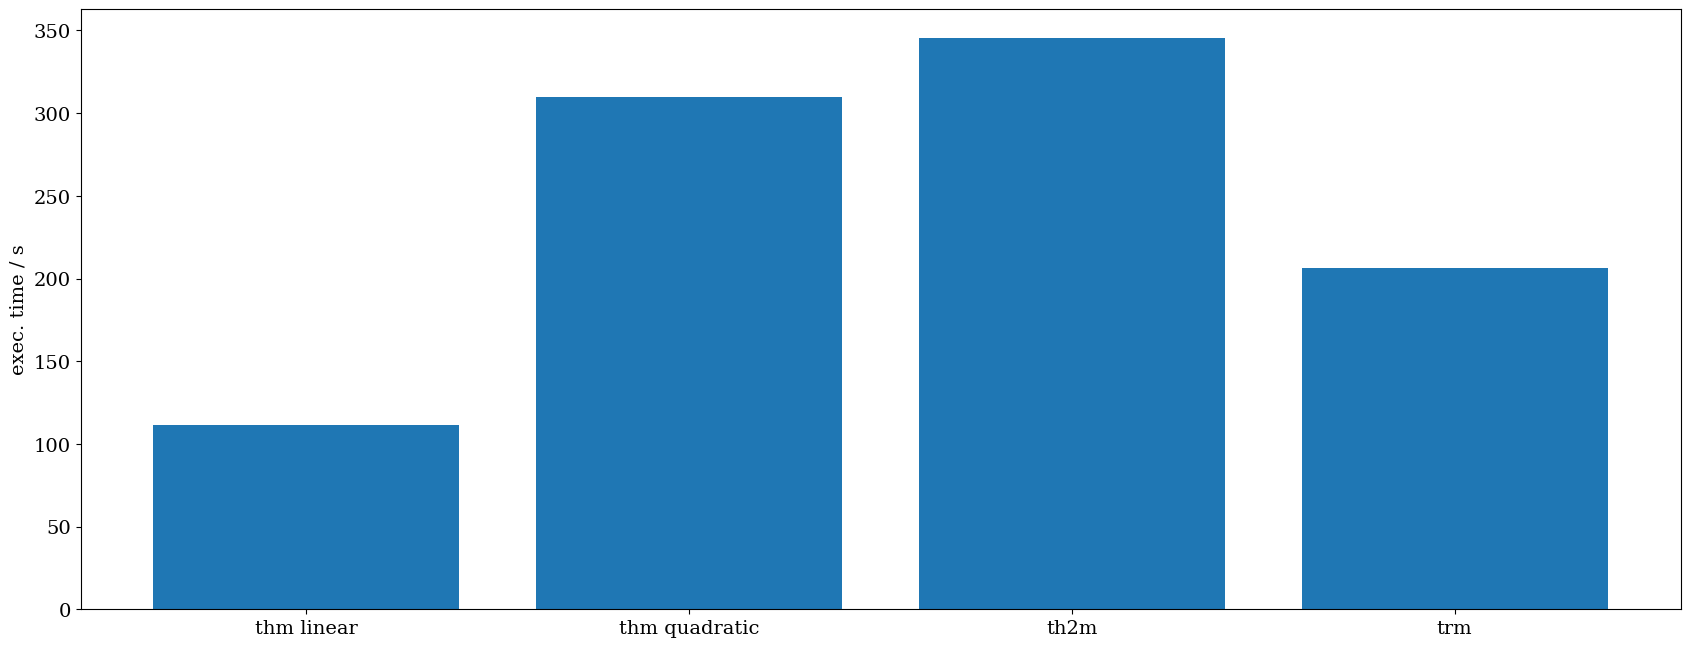

In [16]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
mesh = ["thm linear", "thm quadratic", "th2m", "trm"]
ax.bar(mesh, runtimes)
plt.ylabel("exec. time / s")
plt.show()

## References

[1] Booker, J. R.; Savvidou, C. (1985), Consolidation around a point heat source. International Journal for Numerical and Analytical Methods in Geomechanics, 1985, 9. Jg., Nr. 2, S. 173-184.

[2] Chaudhry, A. A.; Buchwald, J.; Kolditz, O. and Nagel, T. (2019), Consolidation around a point heatsource (correction & verification). International Journal for Numerical and Analytical Methods in Geomechanics, 2019, <https://doi.org/10.1002/nag.2998>.